In [1]:
import pandas as pd
import numpy as np
import random as rnd
from scipy.io.arff import loadarff

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)

from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score

# model evaluation calculate and score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,  mean_squared_error

# plot metrics model answer(metrics)
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelBinarizer


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
#import umap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

# import some dependencies to plot

from plotly.offline import iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split, KFold, cross_val_score

# machine learning model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# boosting
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel

# Import for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
df_data = pd.read_csv('data/cleaned/orientdb-1.6.2-Unified.csv')
df_data = df_data.iloc[:, 1:]
df_data

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,bug
0,0.000000,0,0,0,0.000000,0.000000,0,0,1,2,...,12,0,5,0,12,59,0,5,0,0
1,0.000000,0,0,0,0.000000,0.000000,0,0,1,0,...,1,0,1,0,1,1,0,1,0,0
2,0.000000,0,0,0,0.000000,0.000000,0,0,1,0,...,1,0,1,0,1,1,0,1,0,0
3,0.135593,1,3,1,0.085271,0.126761,11,9,1,2,...,10,0,10,0,10,39,0,10,0,0
4,0.196457,1,2,2,0.160920,0.180451,28,24,14,0,...,14,0,14,0,14,88,0,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,0.000000,0,0,0,0.000000,0.000000,0,0,1,2,...,1,0,1,0,1,12,0,1,0,0
1843,0.000000,0,0,0,0.000000,0.000000,0,0,1,2,...,1,0,1,0,1,9,0,1,0,0
1844,0.000000,0,0,0,0.000000,0.000000,0,0,1,0,...,2,0,2,0,15,8,0,10,0,0
1845,0.000000,0,0,0,0.000000,0.000000,0,0,1,2,...,1,0,1,0,1,12,0,1,0,0


In [3]:
df_data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847 entries, 0 to 1846
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CC      1847 non-null   float64
 1   CCL     1847 non-null   int64  
 2   CCO     1847 non-null   int64  
 3   CI      1847 non-null   int64  
 4   CLC     1847 non-null   float64
 5   CLLC    1847 non-null   float64
 6   LDC     1847 non-null   int64  
 7   LLDC    1847 non-null   int64  
 8   LCOM5   1847 non-null   int64  
 9   NL      1847 non-null   int64  
 10  NLE     1847 non-null   int64  
 11  WMC     1847 non-null   int64  
 12  CBO     1847 non-null   int64  
 13  CBOI    1847 non-null   int64  
 14  NII     1847 non-null   int64  
 15  NOI     1847 non-null   int64  
 16  RFC     1847 non-null   int64  
 17  AD      1847 non-null   float64
 18  CD      1847 non-null   float64
 19  CLOC    1847 non-null   int64  
 20  DLOC    1847 non-null   int64  
 21  PDA     1847 non-null   int64  
 22  

In [4]:
df_data.describe() #shows simple statistics (min, max, mean, etc.)

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,bug
count,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,...,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000
mean,0.139953,1.317813,7.255008,2.736329,0.126463,0.130239,26.074716,21.039524,1.736871,1.724418,...,9.054142,0.651326,7.855983,0.442880,17.995669,57.939903,1.571738,14.690850,0.948565,0.151597
std,0.291831,5.829486,58.580467,18.603705,0.273749,0.277049,142.625763,115.216190,2.867810,2.299457,...,15.127995,2.569242,12.856481,1.678964,29.425650,140.938251,4.389380,23.969244,2.574998,0.358727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,4.000000,0.000000,3.000000,0.000000,9.000000,15.000000,0.000000,8.000000,0.000000,0.000000
75%,0.080455,1.000000,1.000000,1.000000,0.071557,0.082989,6.000000,6.000000,2.000000,3.000000,...,10.000000,0.000000,8.000000,0.000000,20.000000,46.000000,1.000000,16.000000,1.000000,0.000000
max,1.000000,99.000000,1649.000000,478.000000,1.000000,1.000000,2570.000000,2116.000000,54.000000,23.000000,...,269.000000,54.000000,162.000000,29.000000,461.000000,1774.000000,54.000000,264.000000,29.000000,1.000000


In [5]:
# metric correlations- (step 1)

In [6]:
X_train_size_comlexity_features = df_data[['CCO','NLE','NII','NOI','TCLOC','PUA','TNOS']]
X_train_oop_features = df_data[['LCOM5','NOC','CBOI','NPA','NG','NA','WMC','CBO','RFC','NS','DIT']]

In [7]:
X_train_size_comlexity_features = df_data[['CCO','NLE','NII','NOI','TCLOC','PUA','TNOS']]
X_train_oop_features = df_data[['LCOM5','NOC','WMC','CBO','RFC','DIT']]

In [199]:
# Variance inflation factor analysis  (VIF) - setp 2

In [8]:
def vif(features):

    # Prepare a dataframe for VIF
    X_VIF = add_constant(features)

    # Simulate a multicollinearity situation of AddedLOC, A, and B
    #X_VIF['A'] = [2 * x_i + random.random() for x_i in X_VIF['AddedLOC']]
    #X_VIF['B'] = [3 * x_i + random.random() for x_i in X_VIF['AddedLOC']]

    # Calculate VIF scores
    vif_scores = pd.DataFrame([variance_inflation_factor(X_VIF.values, i) 
                   for i in range(X_VIF.shape[1])], 
                  index=X_VIF.columns)
    # Prepare a final dataframe of VIF scores
    vif_scores.reset_index(inplace = True)
    vif_scores.columns = ['Feature', 'VIFscore']
    vif_scores = vif_scores.loc[vif_scores['Feature'] != 'const', :]
    vif_scores = vif_scores.sort_values(by = ['VIFscore'], ascending = False)
    return vif_scores

In [9]:
vif(X_train_size_comlexity_features)

,Feature,VIFscore
7,TNOS,5.488600
4,NOI,3.640867
1,CCO,2.092212
6,PUA,2.018646
2,NLE,1.612362
5,TCLOC,1.284992
3,NII,1.148833


In [88]:
# drop columns 7

In [10]:
X_train_size_comlexity_features= X_train_size_comlexity_features.drop(labels=['TNOS'],axis='columns')

In [11]:
vif(X_train_size_comlexity_features)

,Feature,VIFscore
4,NOI,2.289462
6,PUA,1.879204
2,NLE,1.592782
1,CCO,1.161544
3,NII,1.139326
5,TCLOC,1.132136


In [12]:
X_train_size_comlexity_features.columns

Index(['CCO', 'NLE', 'NII', 'NOI', 'TCLOC', 'PUA'], dtype='object')

In [13]:
vif(X_train_oop_features)

,Feature,VIFscore
5,RFC,7.193508
4,CBO,4.239492
3,WMC,3.629931
6,DIT,1.111066
1,LCOM5,1.108539
2,NOC,1.005110


In [92]:
# drop columns 9,10,5,6

In [14]:
X_train_oop_features= X_train_oop_features.drop(labels=['RFC'],axis='columns')

In [15]:
vif(X_train_oop_features)

,Feature,VIFscore
4,CBO,2.241400
3,WMC,2.127792
5,DIT,1.096900
1,LCOM5,1.051626
2,NOC,1.004692


In [16]:
X_train_oop_features.columns

Index(['LCOM5', 'NOC', 'WMC', 'CBO', 'DIT'], dtype='object')

In [ ]:
#featres after step1 & step 2

In [17]:
X_train_all_features = df_data[['CCO', 'NLE', 'NII', 'NOI', 'TCLOC', 'PUA','LCOM5', 'NOC', 'CBOI', 'NPA', 'WMC', 'CBO', 'DIT','NA']]

In [18]:
X_train_all_features = pd.concat([X_train_size_comlexity_features, X_train_oop_features], axis=1)

In [19]:
vif(X_train_all_features)

,Feature,VIFscore
4,NOI,8.116552
10,CBO,7.521833
9,WMC,4.905102
6,PUA,2.552978
2,NLE,2.071748
1,CCO,1.389612
5,TCLOC,1.369455
7,LCOM5,1.222063
3,NII,1.192775
11,DIT,1.132453


In [20]:
X_train_all_features= X_train_all_features.drop(labels=['NOI'],axis='columns')

In [21]:
vif(X_train_all_features)

,Feature,VIFscore
8,WMC,4.584189
9,CBO,2.759314
5,PUA,2.435507
2,NLE,2.049341
1,CCO,1.387450
4,TCLOC,1.367805
6,LCOM5,1.209453
3,NII,1.192750
10,DIT,1.118355
7,NOC,1.023130


In [21]:
#X_train_all_features= X_train_all_features.drop(labels=['WMC'],axis='columns')

In [22]:
X = df_data.iloc[:, 0:-1]
y = df_data["bug"]

#y = df_data.pop('Defective')
#X = df_data

print("X:", X.shape)
print("y:", y.shape)

X: (1847, 60)
y: (1847,)


In [ ]:
#resampling

Classes: [0, 1]
Counts: [1567, 280]


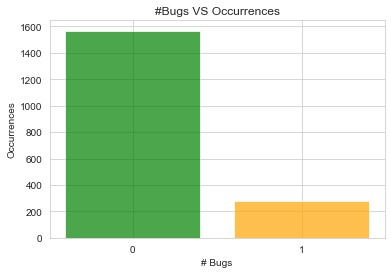

In [23]:
unique, counts = np.unique(y, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [19]:
#oversampling using SMOTE up to 30%

In [24]:
from imblearn.over_sampling import SMOTE
X_train_over_sampled, y_train_over_sampled = SMOTE(sampling_strategy=0.3).fit_resample(X, y)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape)

Train: (2037, 60) (2037,)


Classes: [0, 1]
Counts: [1567, 470]


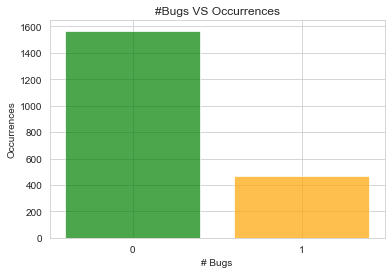

In [25]:
unique, counts = np.unique(y_train_over_sampled, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [26]:
bugs= y_train_over_sampled.groupby(y_train_over_sampled)
bugs.size()

bug
0    1567
1     470
Name: bug, dtype: int64

In [27]:
X_train_over_sampled = X_train_over_sampled[X_train_all_features.columns]

In [28]:
data = pd.concat([X_train_over_sampled, y_train_over_sampled], axis=1)

In [28]:
data

,CCO,NLE,NII,TCLOC,PUA,LCOM5,NOC,WMC,CBO,DIT,bug
0,0,2,13,10,5,1,6,35,4,1,0
1,0,0,0,7,1,1,0,1,0,0,0
2,0,0,0,7,1,1,0,1,0,0,0
3,3,2,78,48,3,1,0,23,3,0,0
4,2,0,0,0,15,14,0,14,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2032,0,2,8,22,4,4,0,20,9,0,1
2033,0,0,0,0,2,1,0,1,2,0,1
2034,313,7,29,78,27,4,0,276,76,3,1
2035,22,3,7,17,65,6,1,114,30,1,1


In [29]:
# save the dataset for c5
filename = 'orientdb.csv'
data.to_csv('data/cleaned/expr2/{}'.format(filename),sep=',')

In [116]:
# Model construction

In [31]:
validation_size = 0.3
random_seed=7

from sklearn.model_selection import train_test_split
X_train_over_sampled, X_test_over_sampled, y_train_over_sampled, y_test_over_sampled = train_test_split(X_train_over_sampled, y_train_over_sampled, test_size=0.3,random_state=7)
X_cv_over_sampled, X_test_over_sampled, y_cv_over_sampled, y_test_over_sampled = train_test_split(X_test_over_sampled, y_test_over_sampled, test_size=0.5)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape,
      "Test:", X_test_over_sampled.shape, y_test_over_sampled.shape,
      "Cross Validation", X_cv_over_sampled.shape, y_cv_over_sampled.shape)


Train: (997, 10) (997,) Test: (214, 10) (214,) Cross Validation (214, 10) (214,)


In [30]:
def Modeler(model, X_train, y_train, X_cv, y_cv, params, scale=False, n_jobs=True, pca=False):
    
    if scale & pca:
        pipeline = Pipeline([
            ('scale', StandardScaler()),
            ('dim_reduct', PCA(n_components=4)),
            ('clf', model())])
        print("Scaling and dim reduct...")
        
    elif scale:
        pipeline = Pipeline([ ('scale', StandardScaler()), ('clf', model())])
        
    elif pca:
        pipeline = Pipeline([
        ('dim_reduct', PCA(n_components=pca)),
        ('clf', model())])
    else:
        pipeline = Pipeline([('clf', model())])
        
    grid = GridSearchCV(pipeline, param_grid = params, cv=5, n_jobs=4, refit=True)
    grid.fit(X_cv, y_cv)
    
    best_prameters = {}
    for k, v in grid.best_params_.items():
        best_prameters[k[5:]] = v

    if n_jobs:
        model = model(**best_prameters, n_jobs=4)
    else:
        model = model(**best_prameters)
   
    model.fit(X_train, y_train)
    
    print("Best Parameters for model:", best_prameters)

    return {
        "model": model, 
        "best_params":best_prameters
    }

In [32]:
# metrics method
def metrics_calculate(model_name, y_val, y_pred):
    '''
    0. basic metrics values ['accuracy', 'precision', 'recall', 'fpr', 'fnr', 'auc']
    1. classification report
    2. confusion matrix
    '''
    y_val = np.reshape(y_val, -1).astype(np.int32)
    y_pred = np.where(np.reshape(y_pred, -1) > 0.5, 1, 0)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred,labels=[0,1]).ravel()
    fpr = fp / (tn + fp)
    fnr = fn / (tp + fn)
    auc = roc_auc_score(y_val, y_pred)
    print('Model:%s Acc:%.8f Prec:%.8f Recall:%.8f FNR:%.8f FPR:%.8f AUC:%.8f' % (model_name, accuracy, precision, recall, fnr, fpr, auc))
    print(model_name, 'classification report:\n', classification_report(y_val, y_pred))
    print(model_name, 'confusion_matrix:\n', confusion_matrix(y_val, y_pred))
    print('\n%s FNR:%.8f FPR:%.8f\n%s accuracy:%.8f' % (model_name, fnr, fpr, model_name, accuracy_score(y_pred,y_val)))

In [33]:
def model_eval(model, X_test, y_test, acc=True, recall_=True, auc_=True, plot_conf=True, plot_auc=True, f1=True, prop=False):
    
    res = [None, None, None, None] # Accuracy, auc_roc, f1_score, recall
    y_pred = model.predict(X_test)
    
    if prop:
        y_pred = np.where(y_pred > 0.5, 1, 0)
    
    if f1:
        f_sc = f1_score(y_test, y_pred, average='macro')
        res[2] = f_sc
        
    if acc:
        res[0] = accuracy_score(y_test, y_pred)
        print('accuracy:', res[0] * 100 ,'%')
              
    if recall_:
        res[3]= recall_score(y_test, y_pred, average='macro')
        print('recall:', res[3] * 100 ,'%')
              
    if auc_:
        lb = LabelBinarizer()
        lb.fit(y_test)

        truth = lb.transform(y_test)
        y_pred_encode = lb.transform(y_pred)
              
        res[1] = roc_auc_score(truth, y_pred_encode, average = 'macro')
        print('ROC:', res[1] * 100 ,'%')
              
    if plot_conf:
        fig, ax = plt.subplots(figsize=(10,6))

        conf = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
        sns.heatmap(conf, cmap= 'Set1', annot=True, cbar=False)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix');
    
    if plot_auc:
        fig, ax = plt.subplots(figsize=(10,6))

        if not auc_:
            lb = LabelBinarizer()
            lb.fit(y_test)

            truth = lb.transform(y_test)
            y_pred_encode = lb.transform(y_pred)

        fpr = [None, None, None]
        tpr = [None, None, None]
        auc_of_roc = [None, None, None]
        
        #n_classes = (0, 1)
        
        for i in range(0,1):
            fpr[i], tpr[i], _ = roc_curve(truth[:, i], y_pred_encode[:, i])
            auc_of_roc[i] = auc(fpr[i], tpr[i])
            
        plt.plot(fpr[0], tpr[0], label='0 - area under ROC = %0.3f' % auc_of_roc[0])

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("ROC AUC");
        plt.legend()

    return res

In [34]:
scores = {}

In [85]:
# classifiers after removing multi columnary and over sampling

In [35]:
# AdaBoostClassifier
ada_params = {
    'clf__learning_rate': [0.1, 0.5, 1.0],
    'clf__n_estimators': [100, 200]
}

ada = Modeler(AdaBoostClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, ada_params, scale=False, n_jobs=False)

Best Parameters for model: {'learning_rate': 0.5, 'n_estimators': 100}


accuracy: 80.06535947712419 %
recall: 63.75039897861474 %
ROC: 63.750398978614754 %


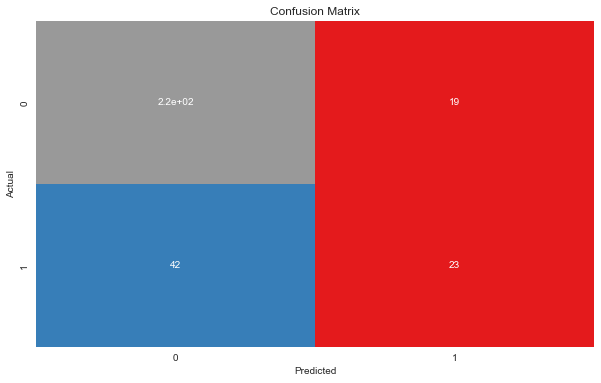

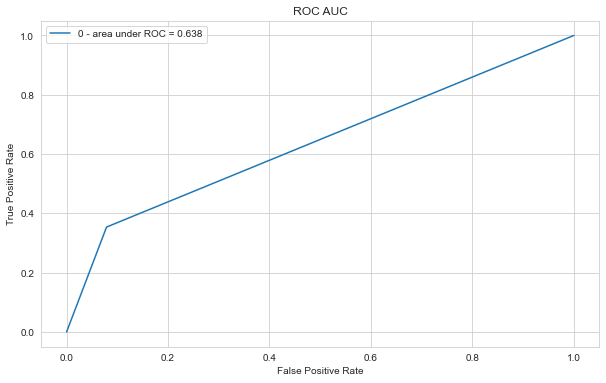

In [36]:
model_scoring = model_eval(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

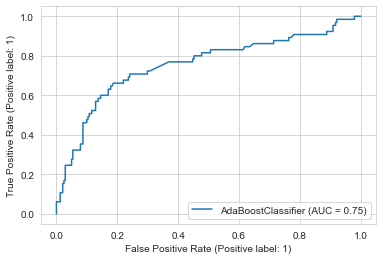

In [37]:
ROC_curve = plot_roc_curve(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [127]:
#xgboost

In [38]:
xg_params = {
    'clf__max_depth': [8, 9],
    'clf__learning_rate': [0.1],
    'clf__n_estimators':[200],
    'clf__reg_alpha':[1.1],
    'clf__colsample_bytree':[0.8],
    'clf__subsample':[0.8, 0.9,],
}

xgboost = Modeler(XGBClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, xg_params, scale=False, n_jobs=5)

[12:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters for model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'reg_alpha': 1.1, 'subsample': 0.9}


accuracy: 85.29411764705883 %
recall: 76.05809128630705 %
ROC: 76.05809128630706 %


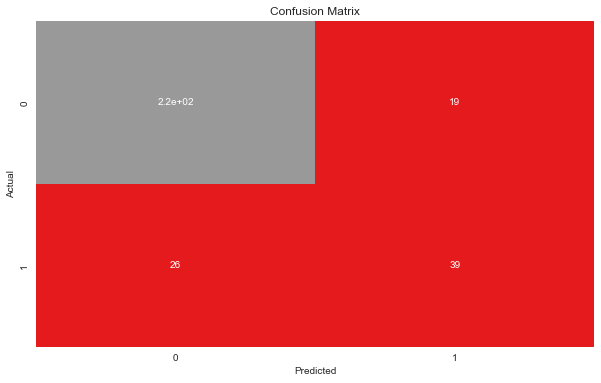

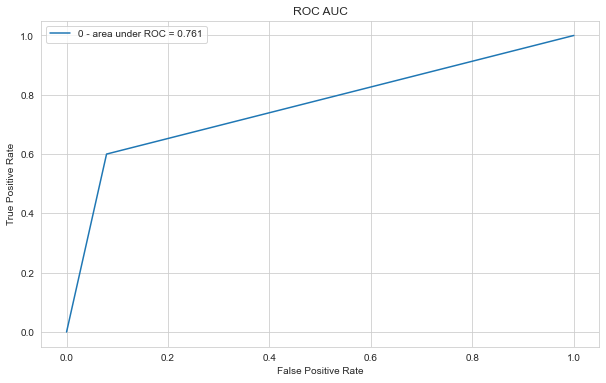

In [39]:
model_scoring = model_eval(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

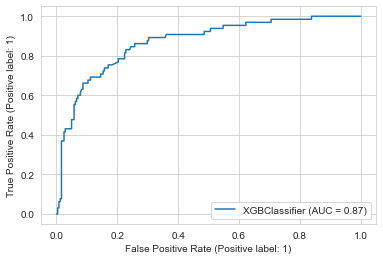

In [40]:
ROC_curve = plot_roc_curve(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# Random Forest

In [55]:
rfc_params = {
    'clf__n_estimators'      : [200, 500],
    'clf__max_depth'         : [10, 20],
    'clf__max_features': [1.0, 0.7, 0.4],
    'clf__criterion' :['gini', 'entropy']
}

rfc = Modeler(RandomForestClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, rfc_params, scale=False) 

Best Parameters for model: {'criterion': 'gini', 'max_depth': 10, 'max_features': 0.4, 'n_estimators': 200}


accuracy: 85.94771241830065 %
recall: 77.03479093520588 %
ROC: 77.03479093520588 %


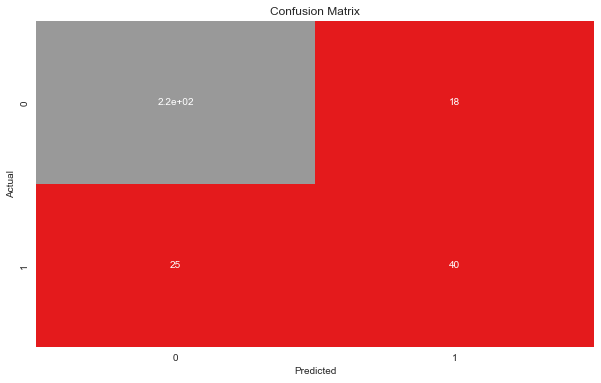

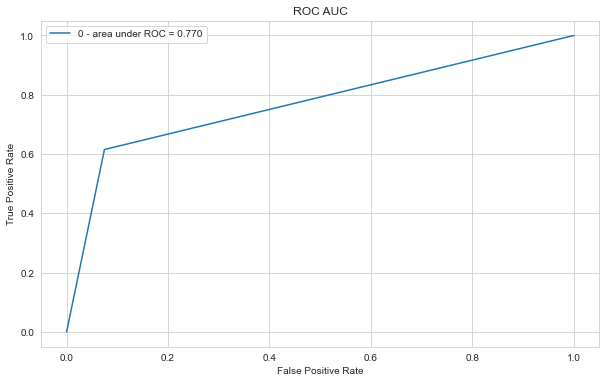

In [56]:
model_scoring = model_eval(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

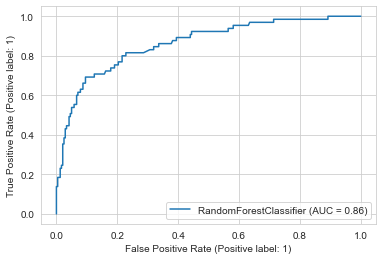

In [57]:
ROC_curve = plot_roc_curve(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [136]:
# SVC

In [44]:
svc_params = {
    'clf__C': [0.1, 1],
    'clf__kernel': ['rbf'],
    'clf__gamma':[1, 0.01]
}

svc = Modeler(SVC, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, svc_params, scale=False, n_jobs=False)

Best Parameters for model: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


accuracy: 80.06535947712419 %
recall: 54.20044685604852 %
ROC: 54.20044685604852 %


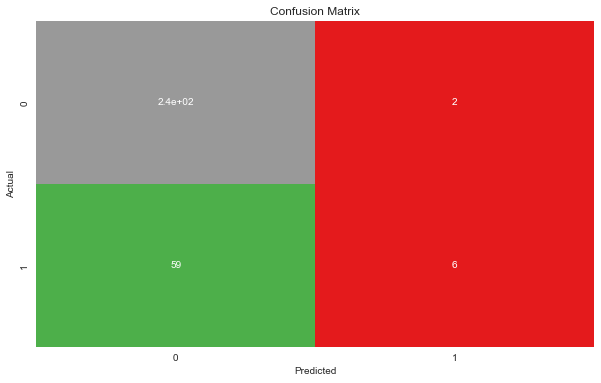

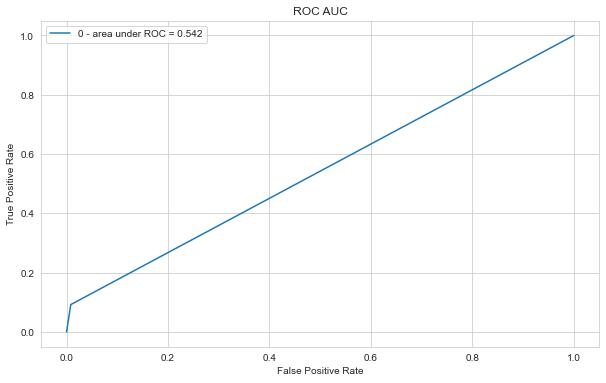

In [45]:
model_scoring = model_eval(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

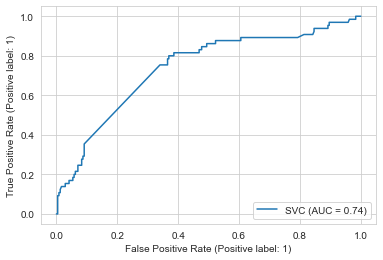

In [46]:
ROC_curve = plot_roc_curve(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# naive_bayes

In [47]:
naive_bayes = Modeler(GaussianNB, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled,params={}, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 75.16339869281046 %
recall: 61.76188956271944 %
ROC: 61.76188956271944 %


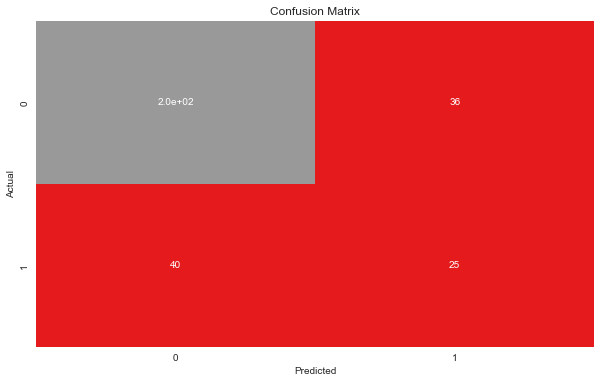

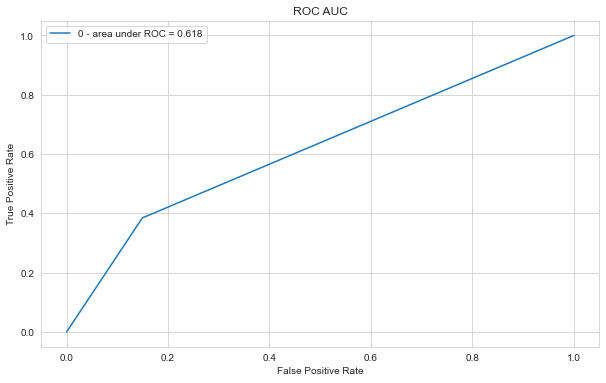

In [48]:
model_scoring = model_eval(naive_bayes["model"], X_test_over_sampled, y_test_over_sampled)
scores["Naive Bayes | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

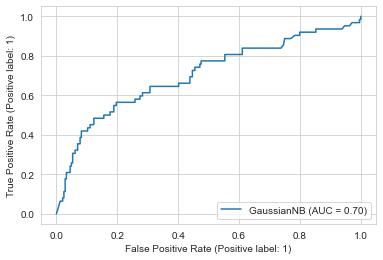

In [49]:
ROC_curve = plot_roc_curve(naive_bayes["model"], X_cv_over_sampled, y_cv_over_sampled)
scores["Naive Bayes | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [175]:
# Model Evaluation Comparision

In [50]:
score_df = pd.DataFrame.from_dict(scores).T
score_df= score_df.sort_values('AUC', ascending=False)

In [58]:
score_df

,Accuracy,ROC,F1-Score,Recall-Score,AUC
XGBoost | Binary,85.29,76.06,77.11,76.06,86.91
Random Forest | Binary,86.93,78.78,79.77,78.78,85.90
AdaBoost Classifier | Binary,80.07,63.75,65.46,63.75,75.35
Support-Vector Machine | Binary,80.07,54.20,52.56,54.20,73.92
Naive Bayes | Binary,75.16,61.76,62.02,61.76,70.38


In [123]:
#feature importance using xgboost

In [32]:
model = XGBClassifier()
model.fit(X_train_over_sampled,y_train_over_sampled)

[00:28:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
print(model.feature_importances_)

[0.07181478 0.0784521  0.08919558 0.16163884 0.07821313 0.10018551
 0.07755368 0.06891174 0.09489564 0.17913902]


In [35]:
feature_list=[];
for feature in zip(X_train_over_sampled.columns,model.feature_importances_):
    feature_list.append(feature)
feature_list.sort(key=lambda item: item[1])
feature_list.reverse()
features= pd.DataFrame(feature_list)
features

,0,1
0,DIT,0.179139
1,TCLOC,0.161639
2,LCOM5,0.100186
3,CBO,0.094896
4,NII,0.089196
5,NLE,0.078452
6,PUA,0.078213
7,NOC,0.077554
8,CCO,0.071815
9,WMC,0.068912


In [138]:
features = pd.DataFrame(model.feature_importances_)
features.describe()

,0
count,10.000000
mean,0.100000
std,0.093085
min,0.039836
25%,0.054199
50%,0.068827
75%,0.075752
max,0.343599


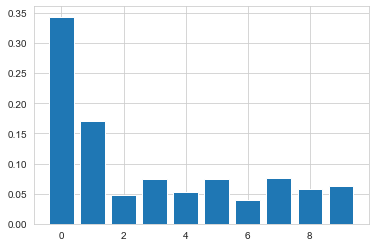

In [139]:
pyplot.bar(range(len(model.feature_importances_)),model.feature_importances_)
pyplot.show()

In [140]:
for feature in zip(X_train_over_sampled.columns,model.feature_importances_):
    print(feature)

('CCO', 0.3435989)
('NLE', 0.17058676)
('NII', 0.047022536)
('NOI', 0.075103715)
('TCLOC', 0.05328217)
('PUA', 0.07414139)
('LCOM5', 0.0398363)
('NOC', 0.075967565)
('CBO', 0.056948848)
('DIT', 0.06351183)


In [141]:
feature_list=[];
for feature in zip(X_train_over_sampled.columns,model.feature_importances_):
    if feature[1] > 0.054:
        print(feature)
        feature_list.append(feature)

('CCO', 0.3435989)
('NLE', 0.17058676)
('NOI', 0.075103715)
('PUA', 0.07414139)
('NOC', 0.075967565)
('CBO', 0.056948848)
('DIT', 0.06351183)


In [ ]:
# ranking features

In [142]:
feature_list.sort(key=lambda item: item[1])
feature_list.reverse()
features= pd.DataFrame(feature_list)
features

,0,1
0,CCO,0.343599
1,NLE,0.170587
2,NOC,0.075968
3,NOI,0.075104
4,PUA,0.074141
5,DIT,0.063512
6,CBO,0.056949


In [143]:
sfm=SelectFromModel(model,threshold=0.054)
X_important_train=sfm.fit(X_train_over_sampled,y_train_over_sampled)

[07:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [144]:
X_train_important_over_sampled = X_important_train.transform(X_train_over_sampled)

In [145]:
X_train_important_over_sampled.shape

(1183, 7)

In [ ]:
#

In [146]:
validation_size = 0.3
random_seed=7

from sklearn.model_selection import train_test_split
X_train_over_sampled, X_test_over_sampled, y_train_over_sampled, y_test_over_sampled = train_test_split(X_train_important_over_sampled, y_train_over_sampled, test_size=0.3,random_state=7)
X_cv_over_sampled, X_test_over_sampled, y_cv_over_sampled, y_test_over_sampled = train_test_split(X_test_over_sampled, y_test_over_sampled, test_size=0.5)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape,
      "Test:", X_test_over_sampled.shape, y_test_over_sampled.shape,
      "Cross Validation", X_cv_over_sampled.shape, y_cv_over_sampled.shape)

Train: (828, 7) (828,) Test: (178, 7) (178,) Cross Validation (177, 7) (177,)


In [127]:
#xgboost

In [147]:
xg_params = {
    'clf__max_depth': [8, 9],
    'clf__learning_rate': [0.1],
    'clf__n_estimators':[200],
    'clf__reg_alpha':[1.1],
    'clf__colsample_bytree':[0.8],
    'clf__subsample':[0.8, 0.9,],
}

xgboost = Modeler(XGBClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, xg_params, scale=False, n_jobs=5)

exception calling callback for <Future at 0x18afea777b8 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\abduhameed\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\Users\abduhameed\Anaconda3\lib\multiprocessing\queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "C:\Users\abduhameed\Anaconda3\lib\site-packages\xgboost\__init__.py", line 9, in <module>
    from .core import DMatrix, DeviceQuantileDMatrix, Booster, DataIter
  File "C:\Users\abduhameed\Anaconda3\lib\site-packages\xgboost\core.py", line 203, in <module>
    _LIB = _load_lib()
  File "C:\Users\abduhameed\Anaconda3\lib\site-packages\xgboost\core.py", line 194, in _load_lib
    """)
xgboost.core.XGBoostError: 
XGBoost Library (xgboost.dll) could not be loaded.
Likely causes:
  *

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [149]:
model_scoring = model_eval(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100)}

ValueError: Feature shape mismatch, expected: 10, got 7

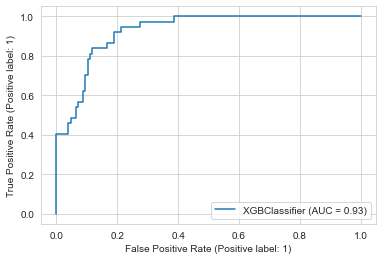

In [183]:
ROC_curve = plot_roc_curve(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)